# Flight Fare Prediction

### INTRODUCTION
The objective of the study is to analyse the flight booking dataset to predict the price of a flight and to conduct various statistical hypothesis tests in order to get meaningful information from it. Various Regression algorithm would be used to train the dataset and predict the continuous target variable to find the best model. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

### Dataset

Dataset contains information about flight booking options for flight travel between India's top 6 metro cities. There are 10683 datapoints and 11 features in the dataset.

### Data Dictionary

The various features of the dataset are explained below:
* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Date of Journey: The date on which the flight to scheduled to depart.
* Source: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Destination: City where the flight will land. It is a categorical feature having 6 unique cities.
* Route: A categorical feature which depicts a flowchart type information about the flight stations including the source and destination cities.
* Dep Time: It stores information about the departure time.
* Arrival Time:  It stores information about the arrival time.
* Duration: It explains the overall amount of time it takes to travel between cities in hours and minutes.
* Total Stops: The intermediate stations on which the flight lands between the source and destination city.
* Additional Info: Whether any additional info is available additional to the existing flight details above.
* Price: Target variable stores information of the ticket price.

## Table of Content

1. **[Data Understanding](#understanding)**
2. **[Feature Extraction](#feature)**
3. **[Univariate Analysis](#univariate)**
4. **[Bivariate Analysis](#bivariate)**
5. **[Statistical Analysis](#statistic)**
6. **[Missing Values](#missing)**
7. **[Outlier Treatment](#outlier)**
8. **[Encoding, Scaling and Feature Transformation](#encoding)**
9. **[Train Test Split](#split)**
10. **[Model Building](#model)**

<a id='understanding'> </a>
## 1. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('flight data.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Size of the data

In [4]:
print('Rows: ',data.shape[0])
print('Columns: ',data.shape[1])

Rows:  10683
Columns:  11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Let's find out the statistical summary of the variables

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [7]:
data.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


* We can see that there is one missing value in route and total stops.
* Price seems to be right skewed where max value is 79512 while 75% of data is bellow 12373.
* Most of the flights in the data is of jet airways.
* For maximum flights source is delhi and destination is cochin.
* Delhi-->mumbai-->cochin is the route with maximum flight.
* Most of the flights have 1 stop.

#### Let's find the cities

In [8]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [9]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

#### Let's correct the new delhi category of destination

In [10]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [11]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<a id='feature' > </a>
## 2. Feature Extraction

#### Lets convert date of journey to datetime and extract meaningful variables

In [12]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],
                                        format='%d/%m/%Y')

In [13]:
data['Journey_weekday'] = data['Date_of_Journey'].dt.weekday

In [14]:
data['Jouney_month'] = data['Date_of_Journey'].dt.month

In [15]:
data['Journey_weekday'].value_counts()

2    2079
0    1850
3    1832
5    1670
6    1474
4     909
1     869
Name: Journey_weekday, dtype: int64

In [16]:
data['Jouney_month'].value_counts()

5    3466
6    3414
3    2724
4    1079
Name: Jouney_month, dtype: int64

In [17]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [18]:
del data['Date_of_Journey']

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6,5,12
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,3,1


In [20]:
route = data['Route'].value_counts()
route.to_dict()

{'DEL → BOM → COK': 2376,
 'BLR → DEL': 1552,
 'CCU → BOM → BLR': 979,
 'CCU → BLR': 724,
 'BOM → HYD': 621,
 'CCU → DEL → BLR': 565,
 'BLR → BOM → DEL': 402,
 'MAA → CCU': 381,
 'DEL → HYD → COK': 326,
 'DEL → JAI → BOM → COK': 240,
 'DEL → BLR → COK': 232,
 'DEL → COK': 213,
 'DEL → AMD → BOM → COK': 205,
 'DEL → MAA → COK': 146,
 'DEL → IDR → BOM → COK': 99,
 'DEL → HYD → MAA → COK': 83,
 'DEL → NAG → BOM → COK': 71,
 'CCU → MAA → BLR': 65,
 'DEL → GOI → BOM → COK': 58,
 'DEL → HYD → BOM → COK': 56,
 'CCU → HYD → BLR': 53,
 'CCU → BBI → BLR': 50,
 'DEL → BHO → BOM → COK': 50,
 'CCU → IXR → DEL → BLR': 46,
 'DEL → CCU → BOM → COK': 44,
 'DEL → PNQ → COK': 42,
 'CCU → BBI → BOM → BLR': 42,
 'CCU → GAU → BLR': 41,
 'DEL → LKO → BOM → COK': 41,
 'DEL → ATQ → BOM → COK': 40,
 'CCU → GAU → DEL → BLR': 39,
 'DEL → JDH → BOM → COK': 37,
 'BLR → HYD → DEL': 37,
 'CCU → DEL → COK → BLR': 36,
 'BOM → DEL → HYD': 33,
 'CCU → BOM → COK → BLR': 30,
 'BLR → MAA → DEL': 29,
 'DEL → BDQ → BOM → COK'

In [21]:
thres = np.percentile(route,96)
thres

551.9600000000003

#### Mapping and converting the route column into busy and non busy route as almost all routes have low frequency as comapred to the top 4 or 5 routes  

In [22]:
data['Route'] = data['Route'].map(route.to_dict())

In [23]:
data['Route'] = np.where(data['Route']>thres,'Busy','Not Busy')

In [24]:
data['Route'].value_counts()

Busy        6817
Not Busy    3866
Name: Route, dtype: int64

So we have categorized route into two categories busy and not busy depending upon the frequency on the route.

In [25]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day
0,IndiGo,Banglore,Delhi,Busy,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,Not Busy,05:50,13:15,7h 25m,2 stops,No info,7662,2,5,1
2,Jet Airways,Delhi,Cochin,Not Busy,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6,9
3,IndiGo,Kolkata,Banglore,Not Busy,18:05,23:30,5h 25m,1 stop,No info,6218,6,5,12
4,IndiGo,Banglore,Delhi,Not Busy,16:50,21:35,4h 45m,1 stop,No info,13302,4,3,1


#### Lets convert dep_time and arrival time to datetime and extract meaningful variables

In [26]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'],format='%H:%M')

In [27]:
data['Dep_Hour'] = data['Dep_Time'].dt.hour

In [28]:
data['Dep_Min'] = data['Dep_Time'].dt.minute

In [29]:
del data['Dep_Time']

In [30]:
data['Arr_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arr_Min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [31]:
del data['Arrival_Time']

In [32]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,Delhi,Busy,2h 50m,non-stop,No info,3897,6,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,Not Busy,7h 25m,2 stops,No info,7662,2,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,Not Busy,19h,2 stops,No info,13882,6,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,Not Busy,5h 25m,1 stop,No info,6218,6,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,Not Busy,4h 45m,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,2h 30m,non-stop,No info,4107,1,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,Busy,2h 35m,non-stop,No info,4145,5,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,Busy,3h,non-stop,No info,7229,5,4,27,8,20,11,20
10681,Vistara,Banglore,Delhi,Busy,2h 40m,non-stop,No info,12648,4,3,1,11,30,14,10


#### Let's convert the duration of flight in minutes

In [33]:
data[['Duration_h','Duration_m']] = data['Duration'].str.split(expand=True)

In [34]:
data['Duration_h']= data['Duration_h'].str.replace('h','')

In [35]:
data['Duration_m'] = data['Duration_m'].str.replace('m','')

In [36]:
data['Duration_h'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

There is '5m' value which is absurd, let's drop this.

In [37]:
data[data['Duration_h']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_h,Duration_m
6474,Air India,Mumbai,Hyderabad,Not Busy,5m,2 stops,No info,17327,2,3,6,16,50,16,55,5m,None


In [38]:
data.drop(index=[6474],inplace=True)

In [39]:
data['Duration_h'] = data['Duration_h'].astype(int)

In [40]:
data['Duration_m'].fillna(0,inplace=True)

In [41]:
data['Duration_m'] = data['Duration_m'].astype(int)

In [42]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_h,Duration_m
0,IndiGo,Banglore,Delhi,Busy,2h 50m,non-stop,No info,3897,6,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,Not Busy,7h 25m,2 stops,No info,7662,2,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,Not Busy,19h,2 stops,No info,13882,6,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,Not Busy,5h 25m,1 stop,No info,6218,6,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,Not Busy,4h 45m,1 stop,No info,13302,4,3,1,16,50,21,35,4,45


In [43]:
data['Duration'] = (60*data['Duration_h']) + data['Duration_m']

In [44]:
data.drop(columns=['Duration_h','Duration_m'],inplace=True)

In [45]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,Delhi,Busy,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,Not Busy,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,Not Busy,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,Not Busy,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,Not Busy,285,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,150,non-stop,No info,4107,1,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,Busy,155,non-stop,No info,4145,5,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,Busy,180,non-stop,No info,7229,5,4,27,8,20,11,20
10681,Vistara,Banglore,Delhi,Busy,160,non-stop,No info,12648,4,3,1,11,30,14,10


<a id='univariate'> </a>
## 3. Univariate Analysis

In [46]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_weekday', 'Jouney_month',
       'Journey_day', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

In [47]:
cat_cols = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Journey_weekday', 'Jouney_month',
       'Journey_day', 'Dep_Hour', 'Arr_Hour']

In [48]:
num_cols = ['Duration','Price']

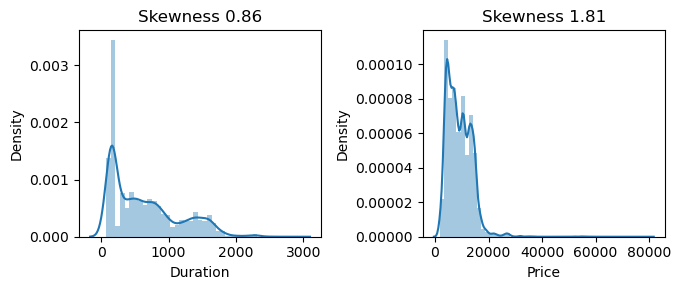

In [49]:
plt.figure(figsize=(7,3))
t=1
for i in num_cols:
    plt.subplot(1,2,t)
    plt.title('Skewness %.2f'%data[i].skew())
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

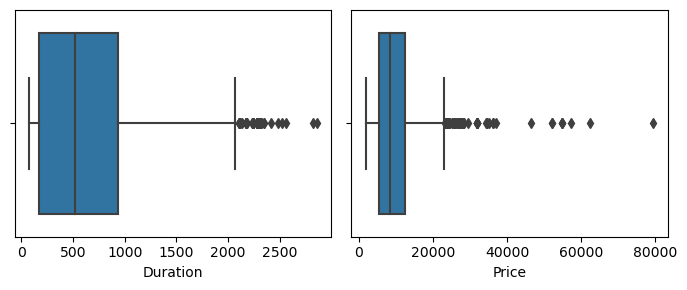

In [50]:
plt.figure(figsize=(7,3))
t=1
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

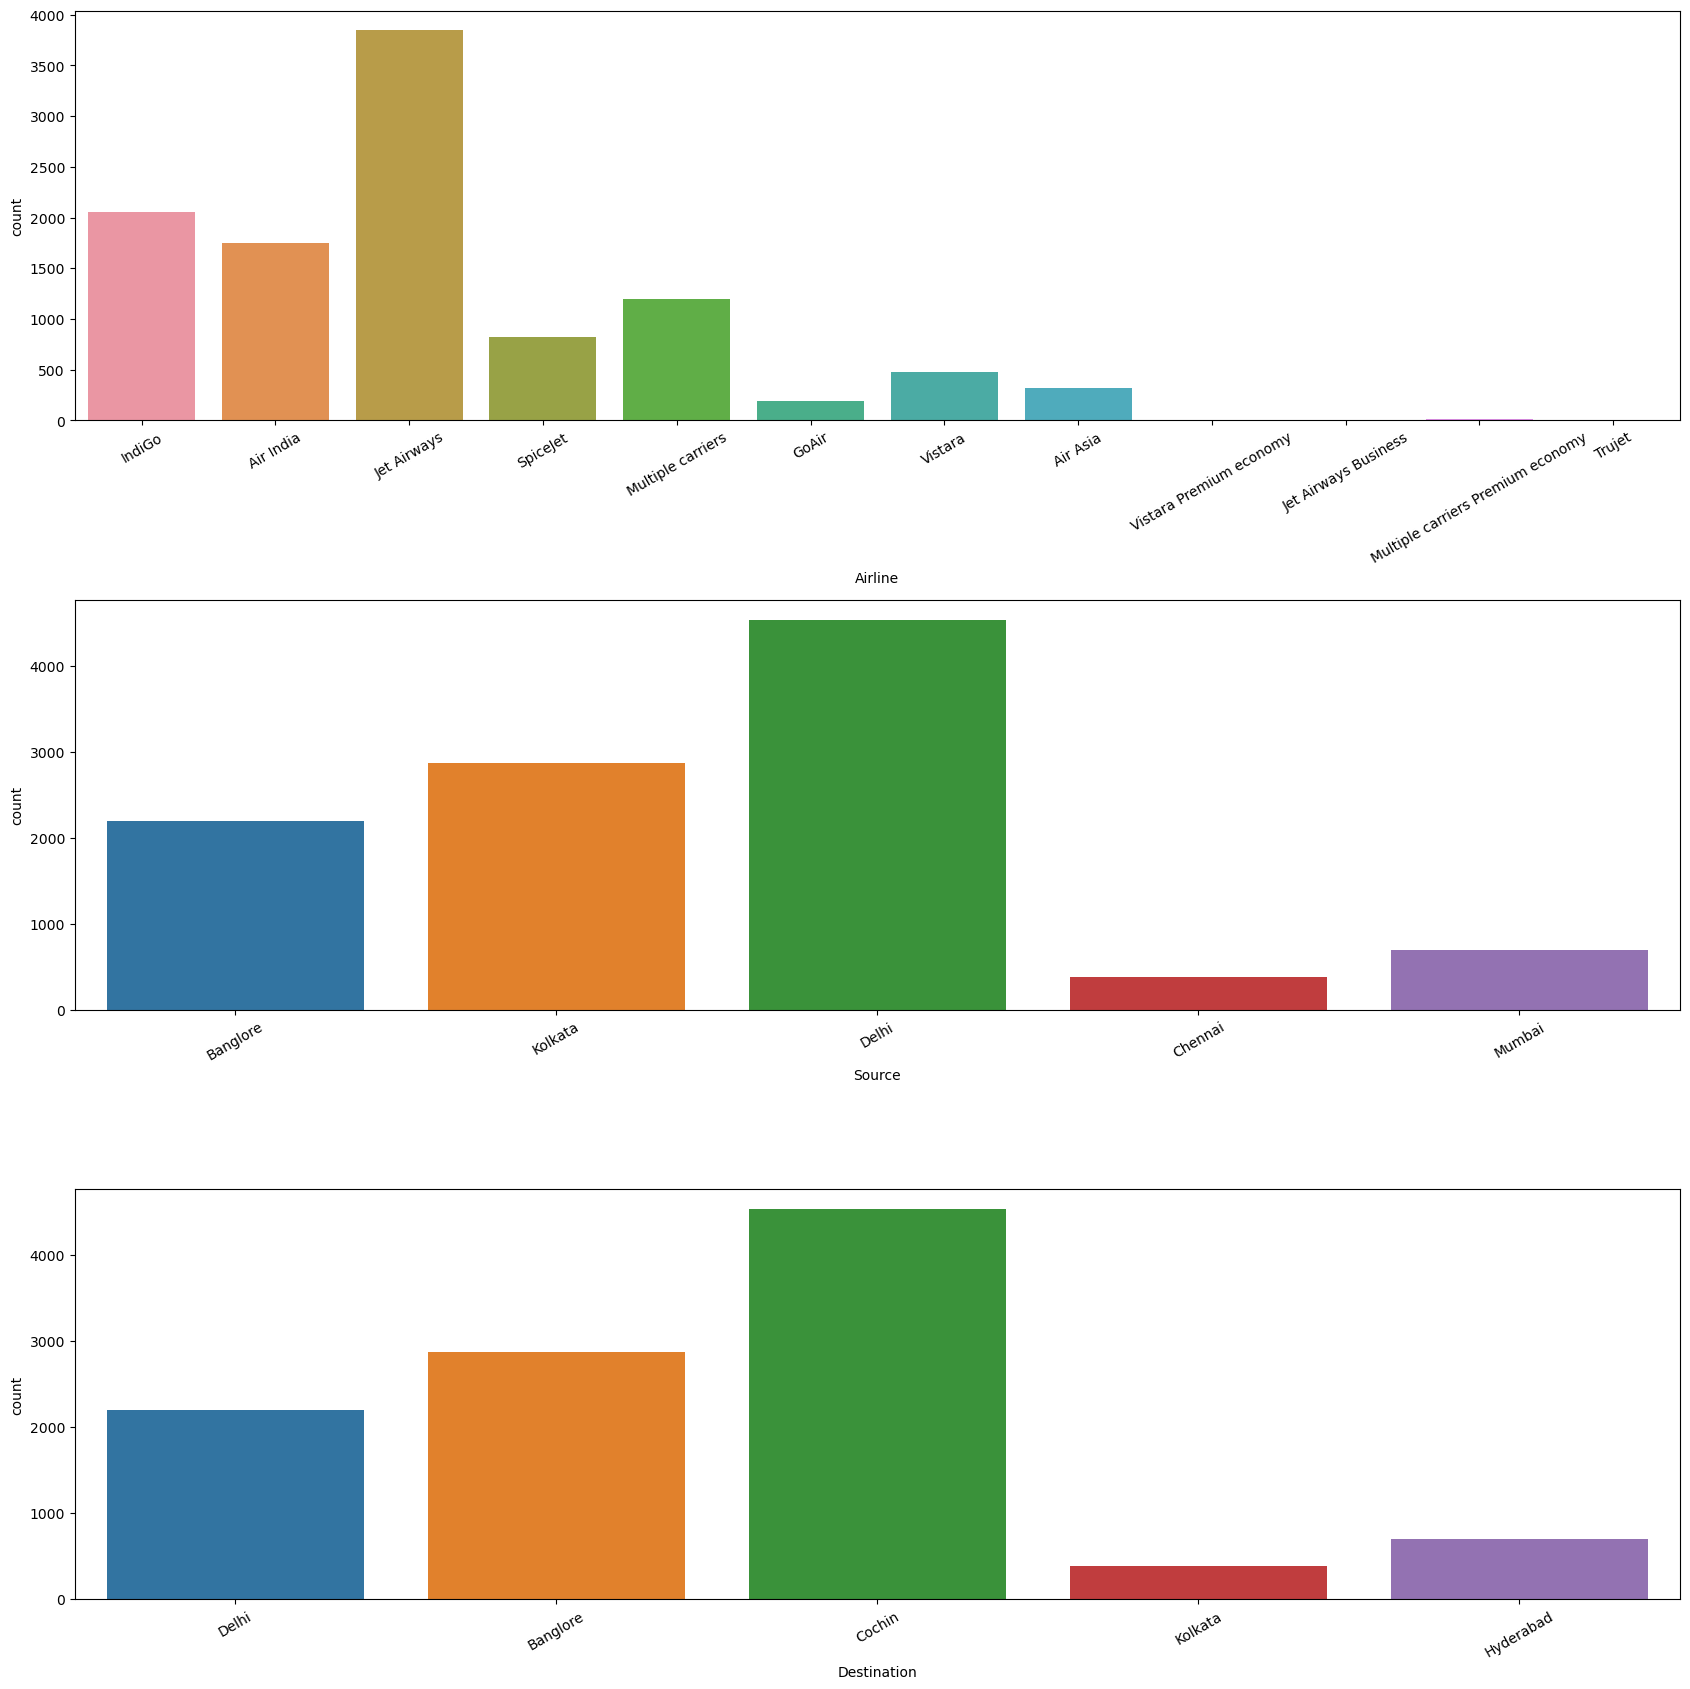

In [51]:
plt.figure(figsize=(17,17))
t=1
for i in cat_cols[:3]:
    plt.subplot(3,1,t)
    sns.countplot(data[i])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()   

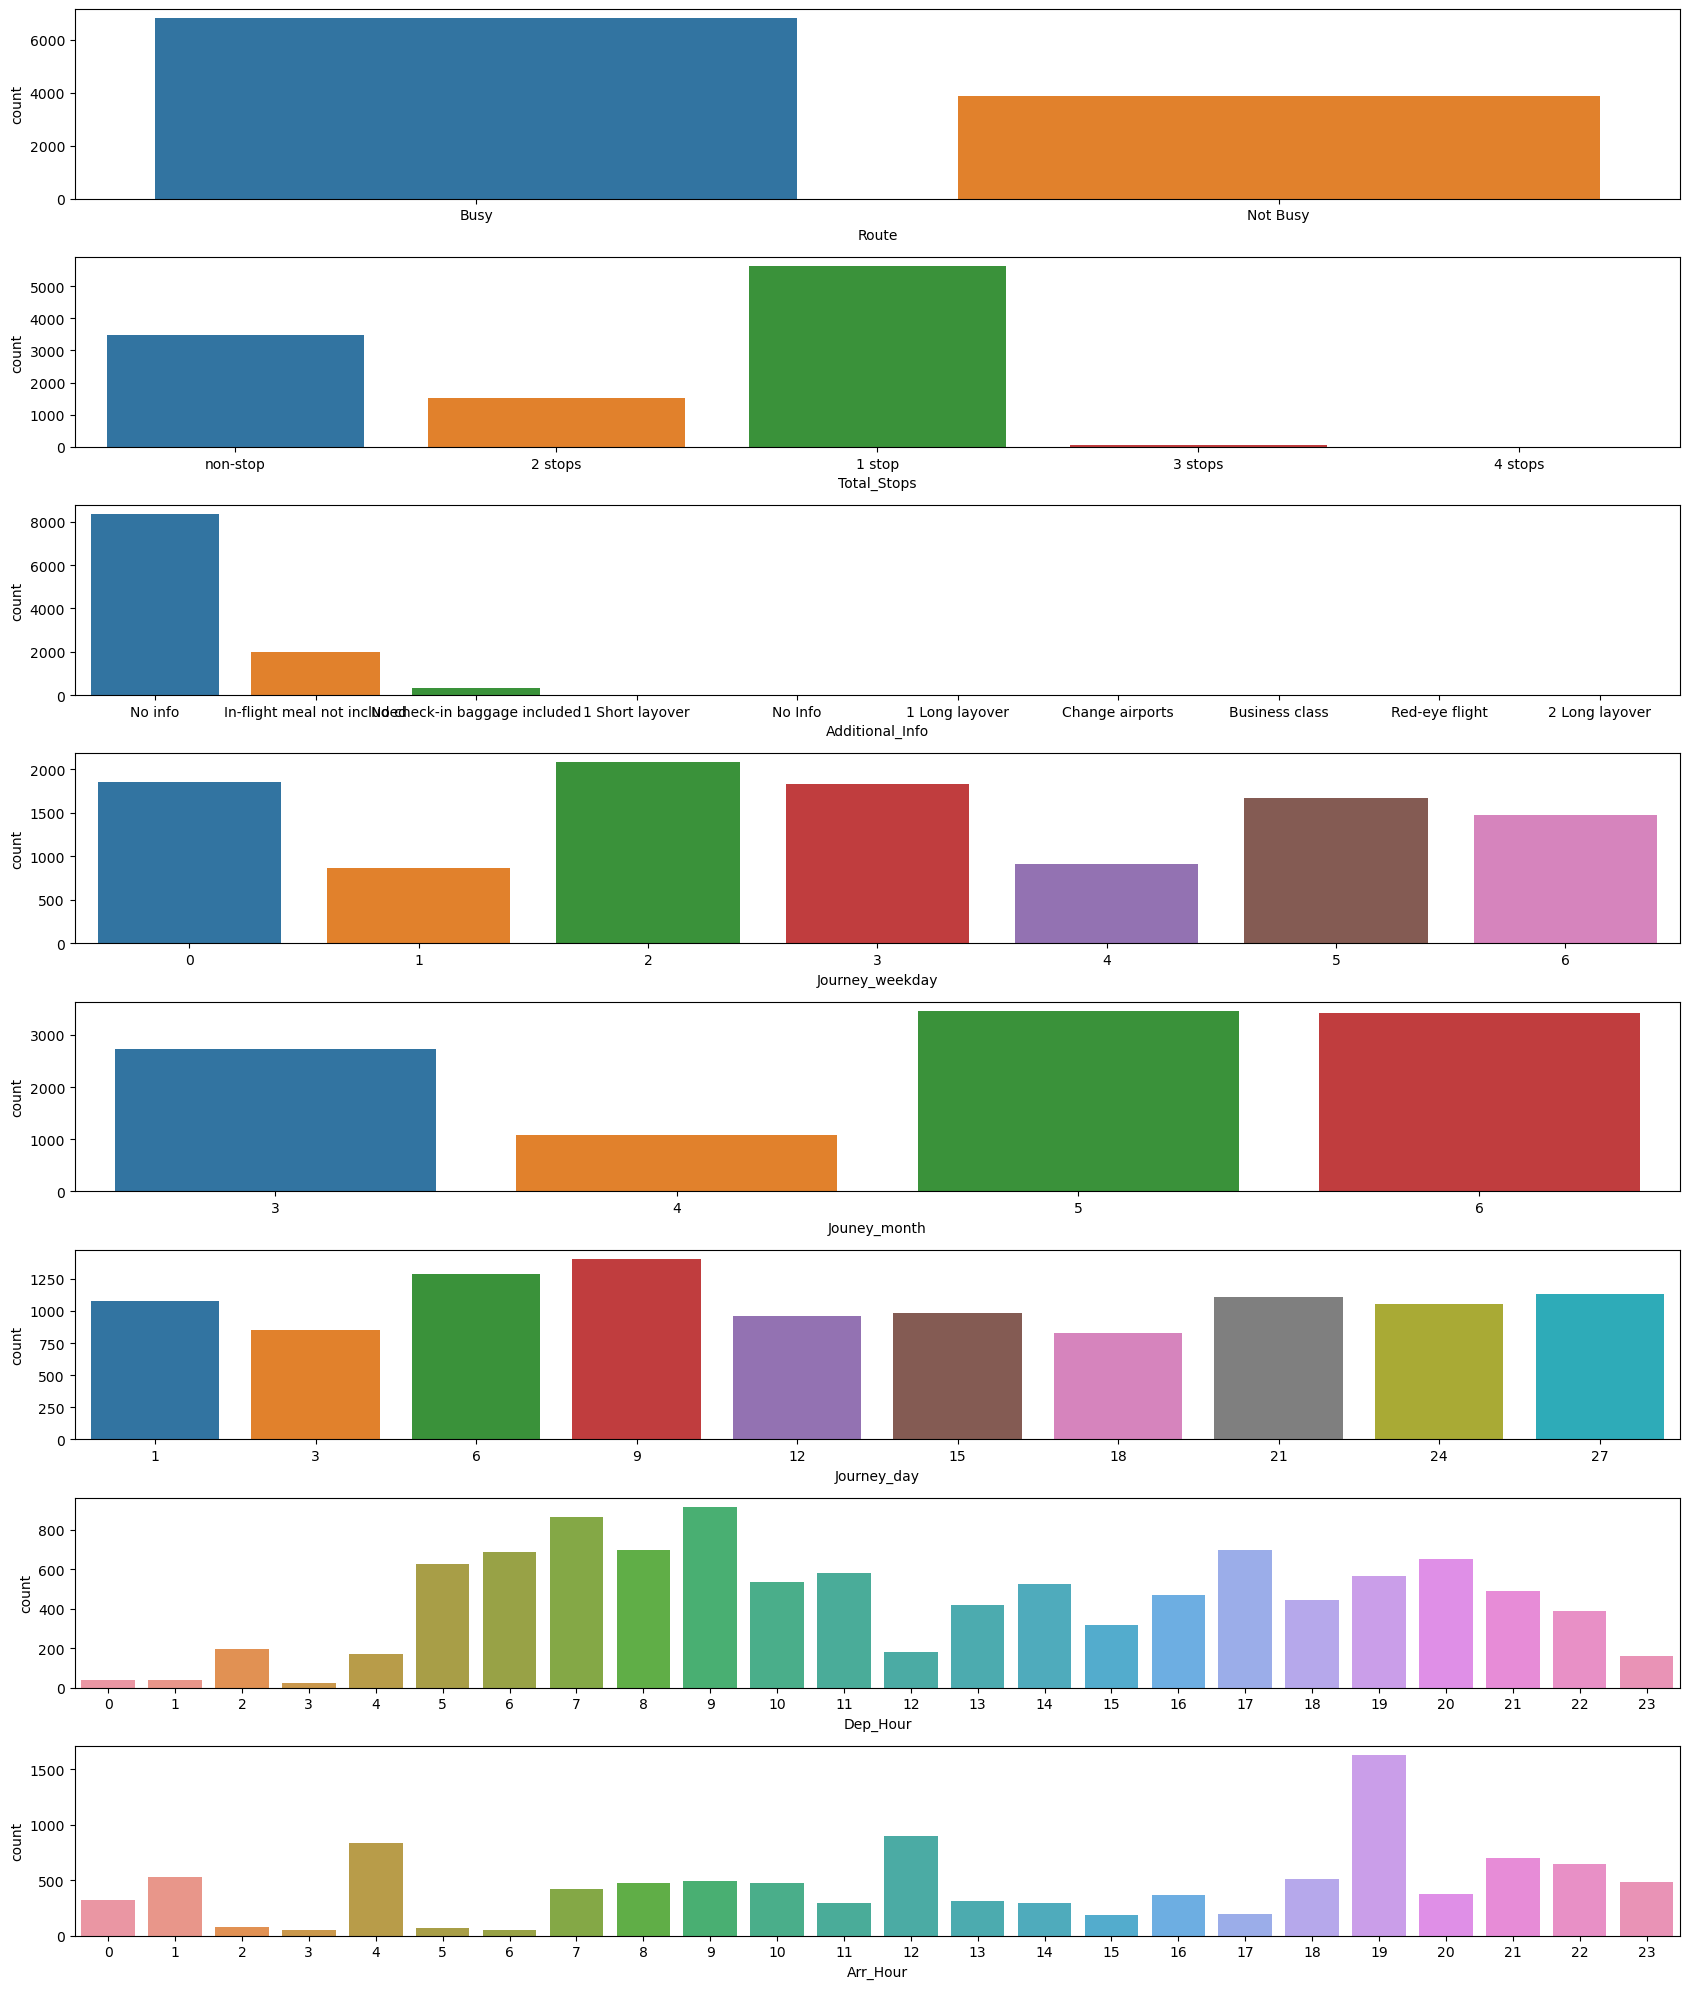

In [52]:
plt.figure(figsize=(17,20))
t=1
for i in cat_cols[3:]:
    plt.subplot(8,1,t)
    sns.countplot(data[i])
    t+=1
plt.tight_layout()
plt.show()   

<a id='bivariate'> </a>
## 4. Bivariate Analysis

#### Number vs number

<AxesSubplot:xlabel='Duration', ylabel='Price'>

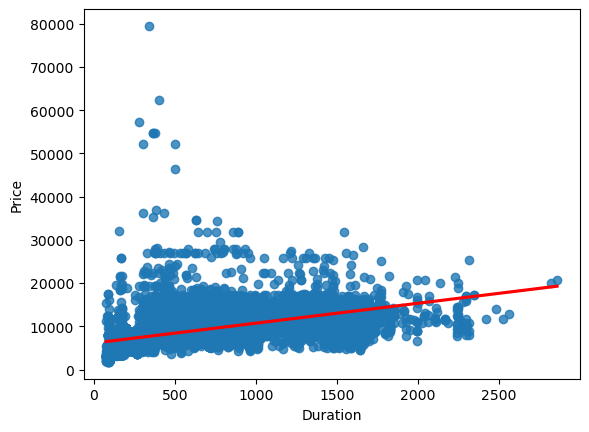

In [53]:
sns.regplot(data['Duration'],data['Price'],line_kws={'color':'red'})

In [54]:
data[['Duration','Price']].corr()

,Duration,Price
Duration,1.000000,0.506695
Price,0.506695,1.000000


#### Category and Number

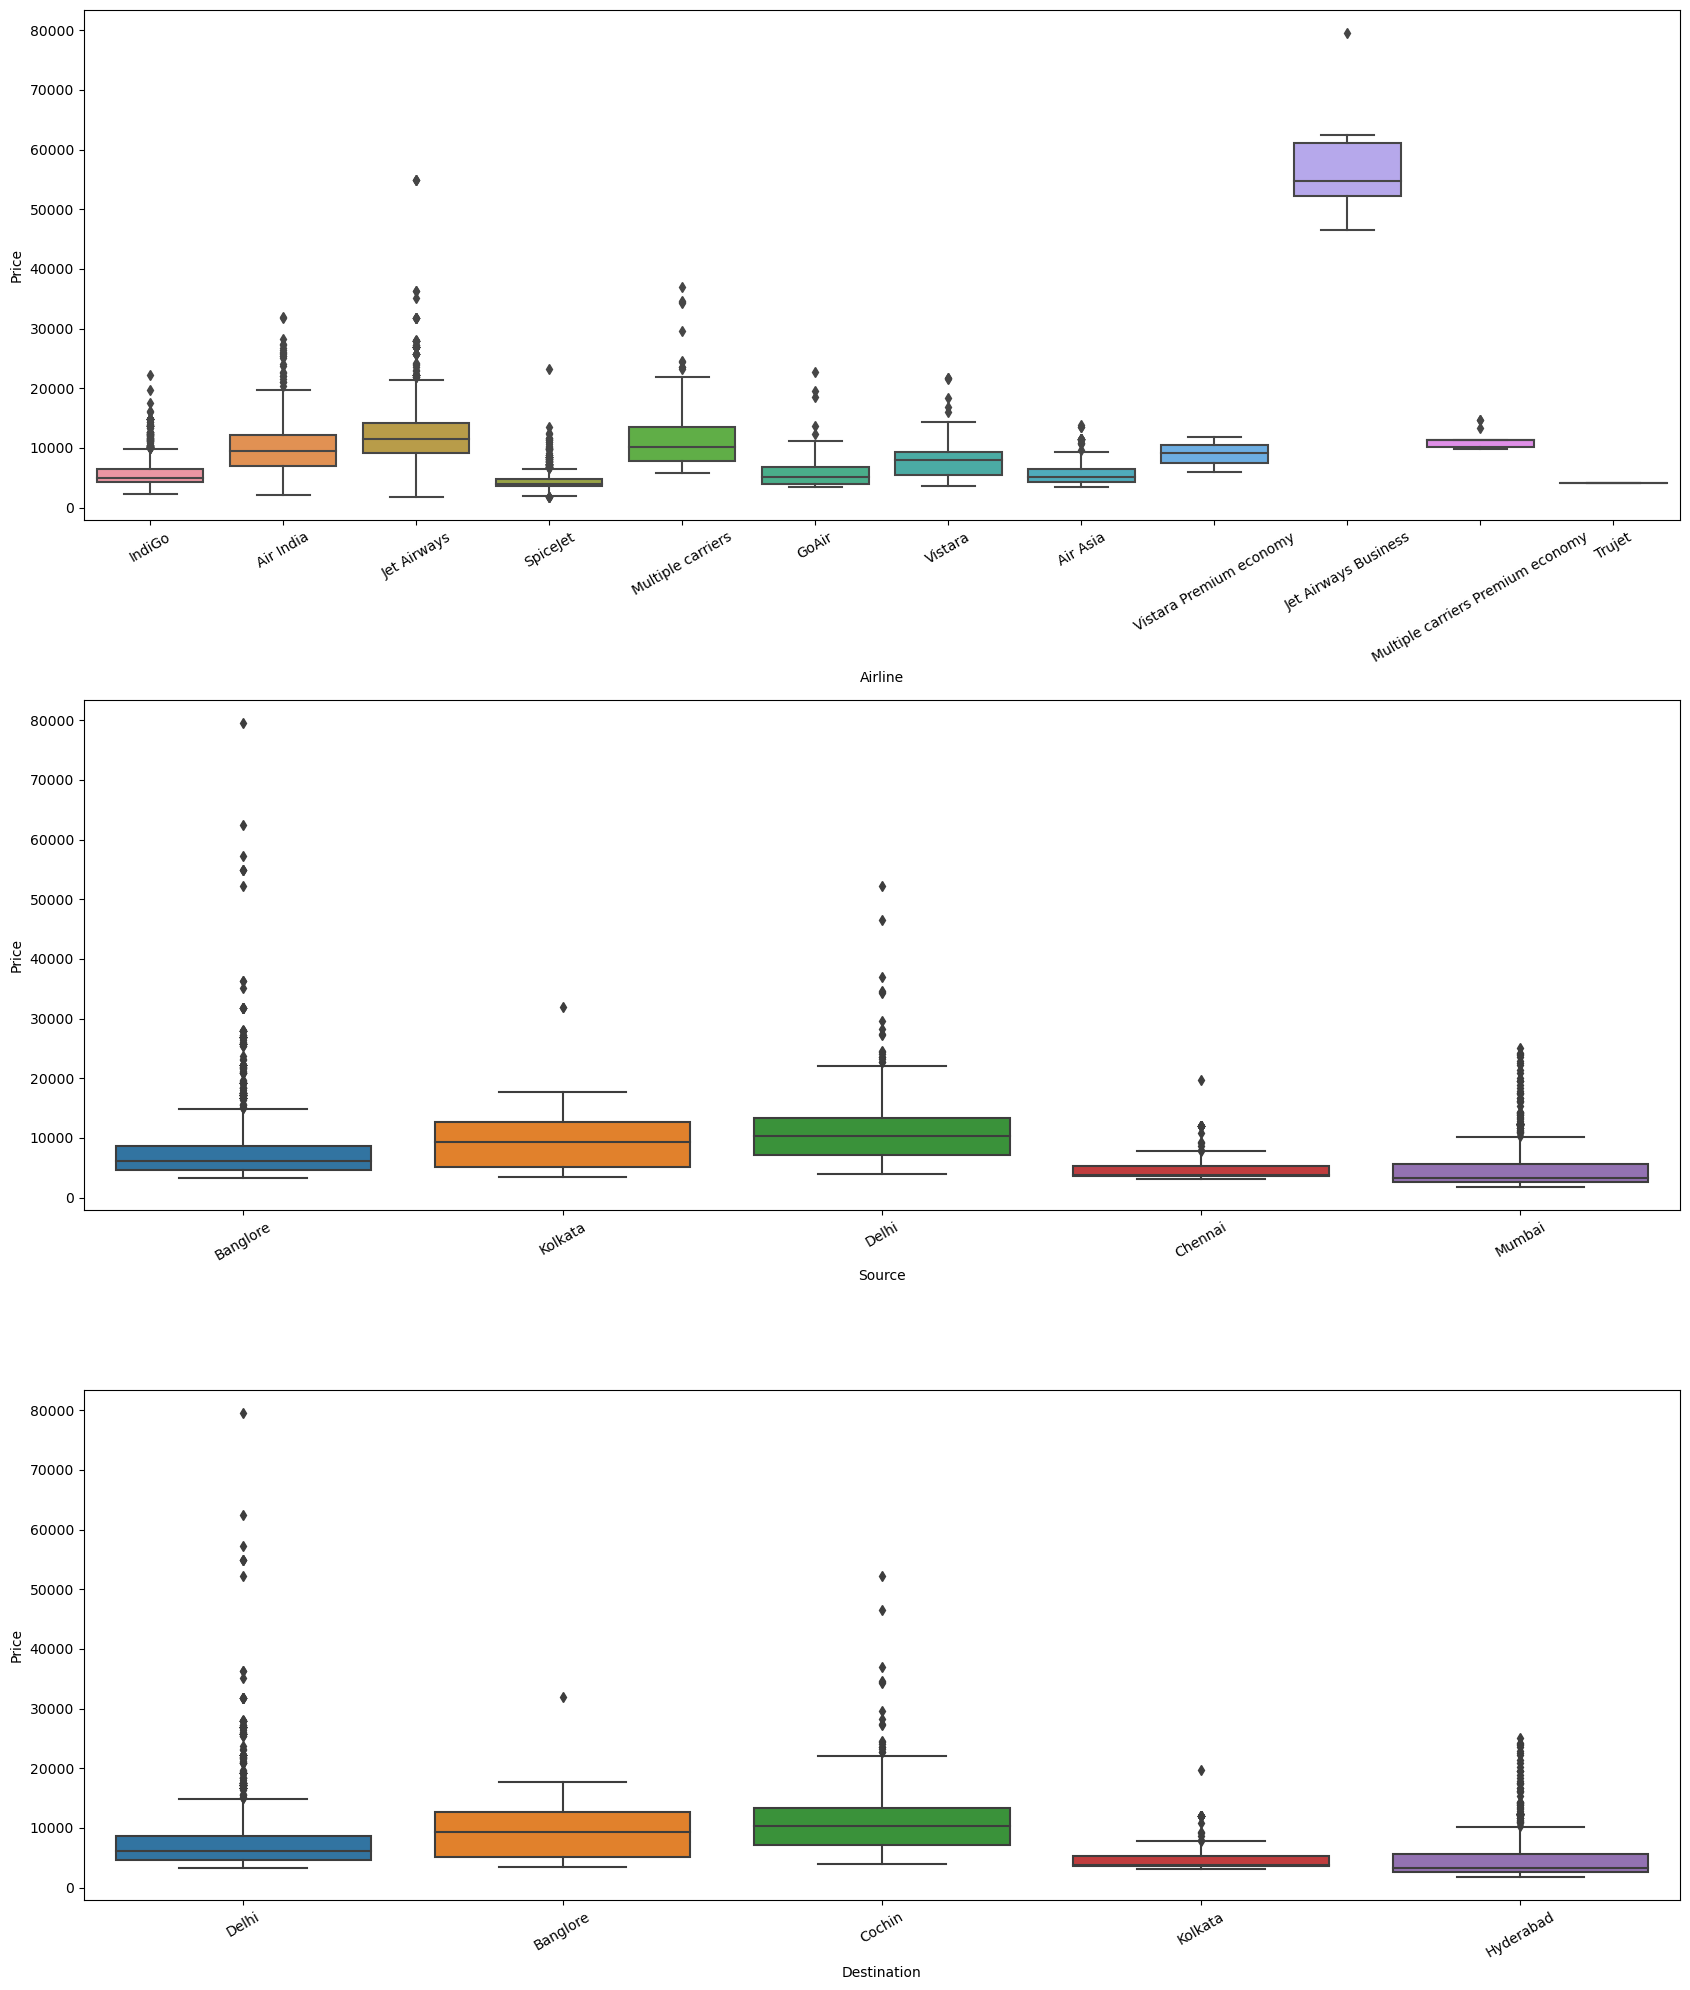

In [55]:
plt.figure(figsize=(17,20))
t=1
for i in cat_cols[:3]:
    plt.subplot(3,1,t)
    sns.boxplot(data[i],data['Price'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

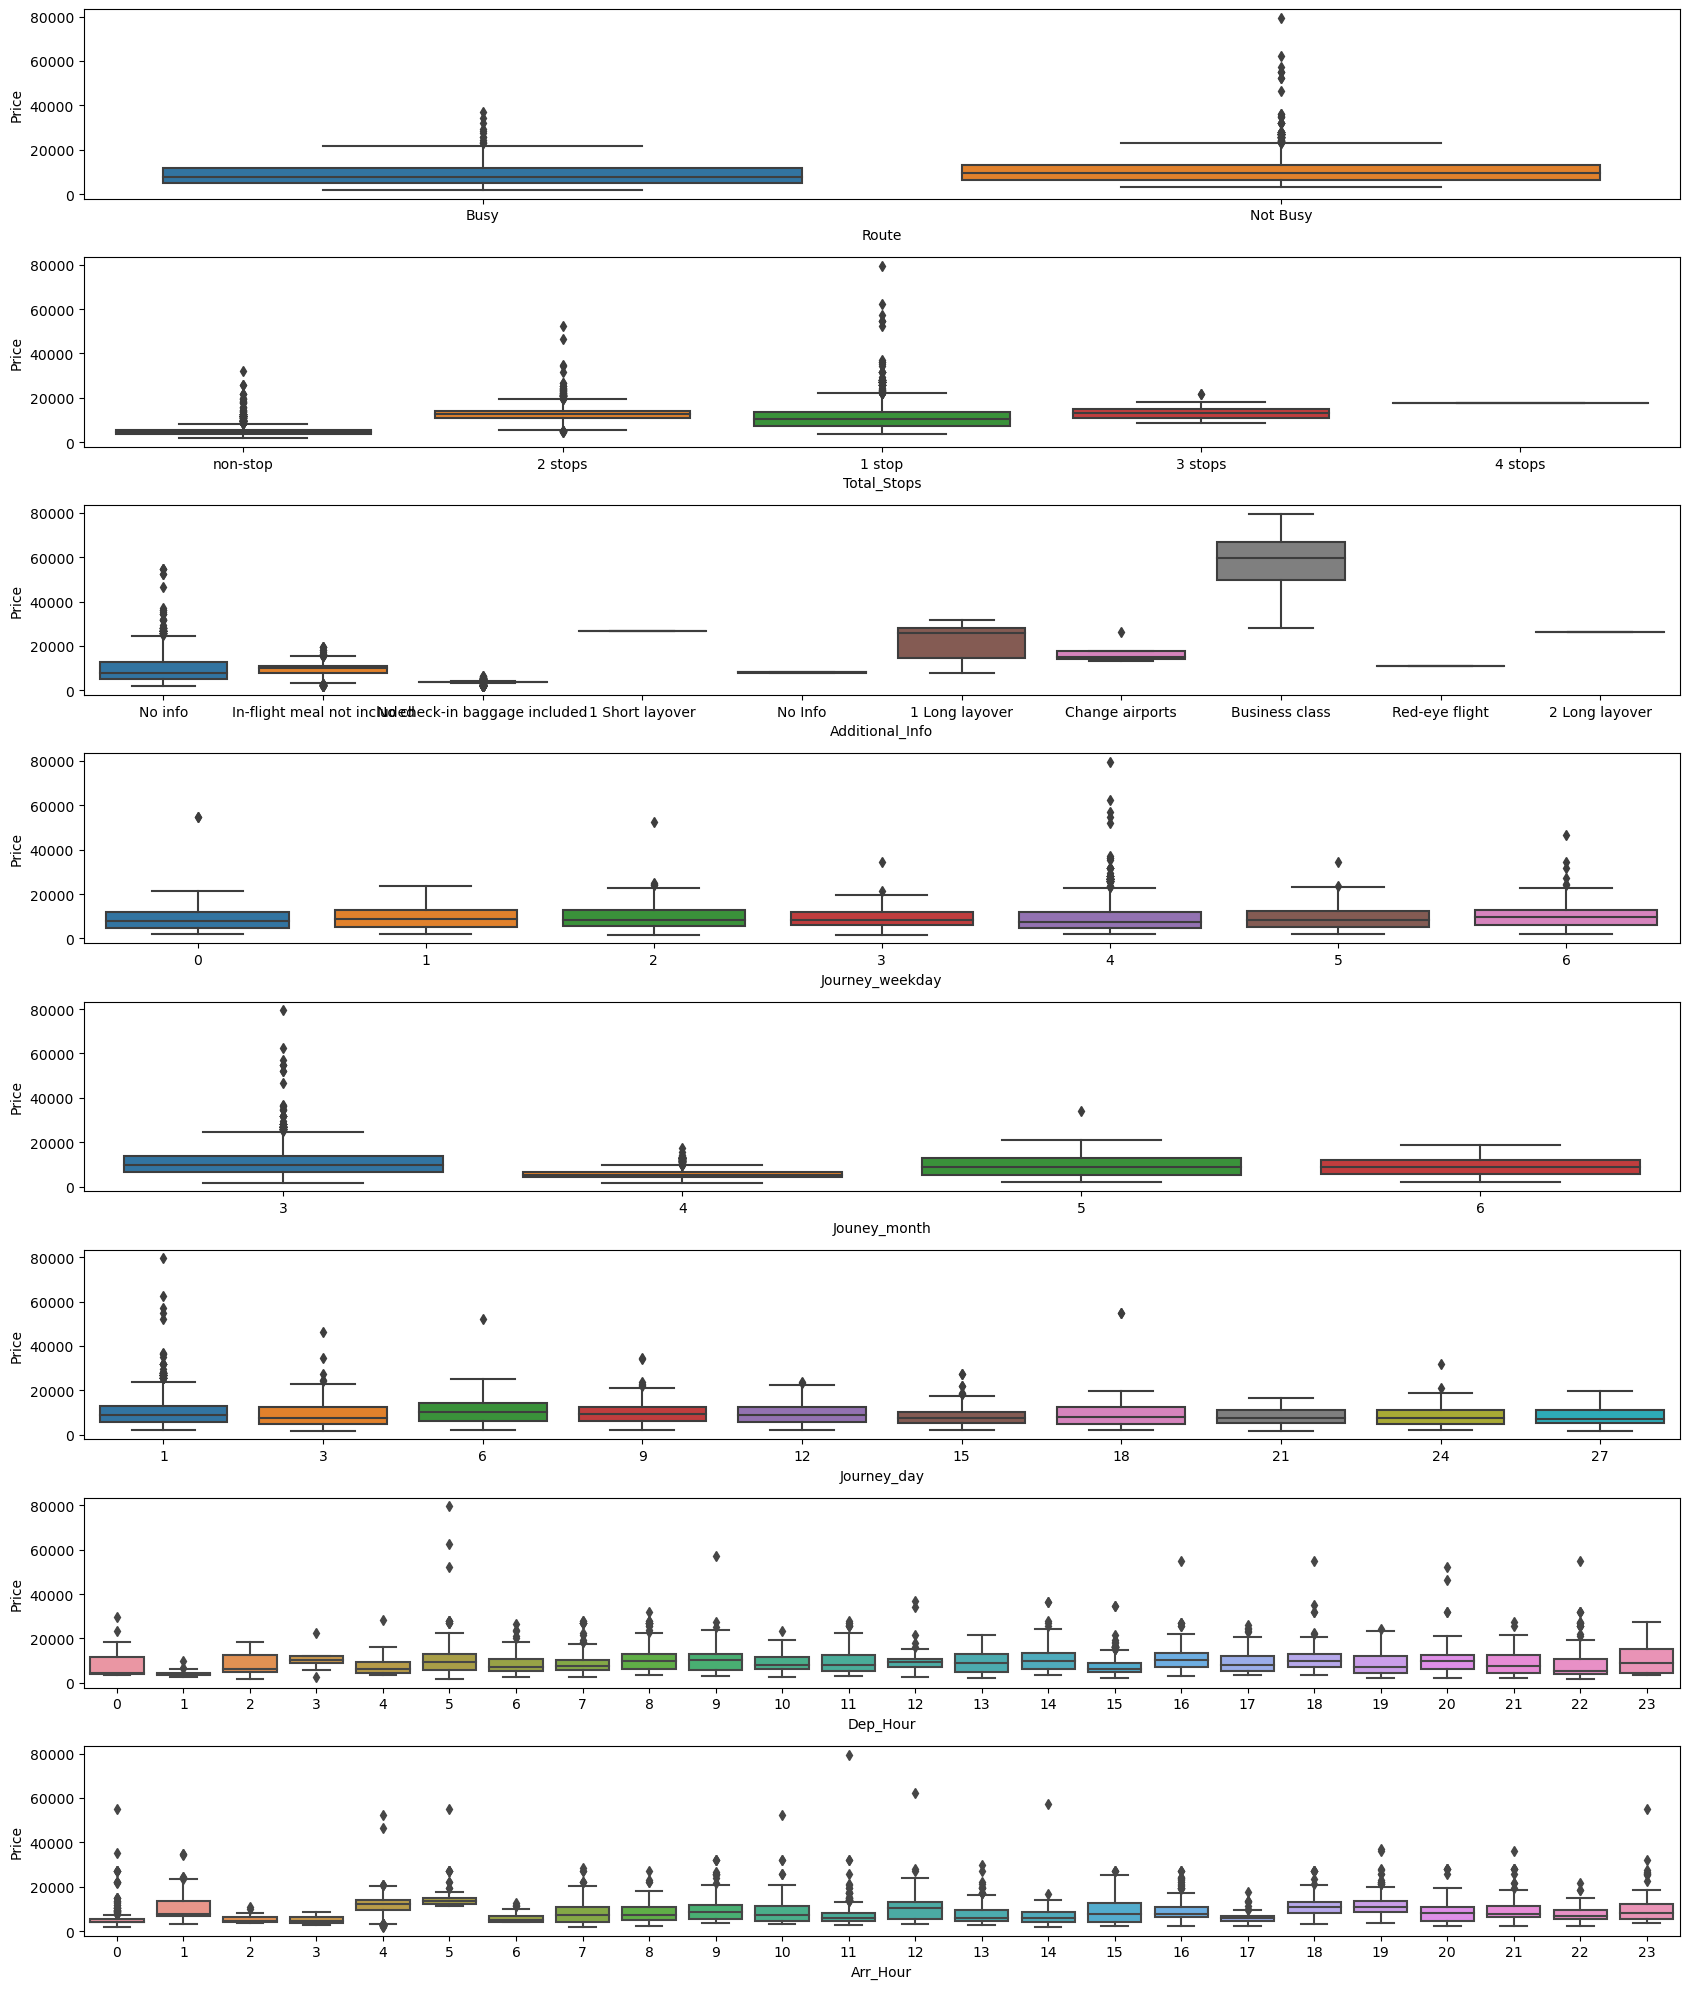

In [56]:
plt.figure(figsize=(17,20))
t=1
for i in cat_cols[3:]:
    plt.subplot(8,1,t)
    sns.boxplot(data[i],data['Price'])
    t+=1
plt.tight_layout()
plt.show()

<a id='statistic'> </a>
## 5. Statistical Analysis

#### Let us prove statistically, that we have any relation between duration and price, We will use two sample t test

#### Lets check for the assumptions

In [57]:
import scipy.stats as stats

In [58]:
# Lets check the normality of the data (Shapiro test)
# Ho: Sample is normal
# Ha: Sample is not normal
stats.shapiro(data['Duration']),stats.shapiro(data['Price'])

(ShapiroResult(statistic=0.8885257244110107, pvalue=0.0),
 ShapiroResult(statistic=0.8955281376838684, pvalue=0.0))

Since p-value is less than 0.05 We have to reject the Ho: that is the data is not normal.

In [59]:
# Ho: The variances are equal
# Ha: The variance are not equal
stats.levene(data['Duration'],data['Price'])

LeveneResult(statistic=12513.256962881536, pvalue=0.0)

Since p-value is less than 0.05 We have to reject the Ho: the variances are different.

Since the assumptions have failed we have to use non parametric test (mannwhitneyu test)

In [60]:
# Ho: The two samples are independent
# Ha: The two samples are dependent
stats.mannwhitneyu(data['Duration'],data['Price'])

MannwhitneyuResult(statistic=12029.5, pvalue=0.0)

We have to reject the ho: hence we will say that price is affected by duration

#### Let us proove statistically relation b/w route and price

In [61]:
samp1 = data[data['Route']=='Busy']['Price']
samp2 = data[data['Route']=='Not Busy']['Price']

In [62]:
samp1.mean()

8468.048701774975

In [63]:
samp2.mean()

10176.737645536869

Lets check the assumptions before two sample t-test

In [64]:
# Normality
stats.shapiro(samp1),stats.shapiro(samp2)

(ShapiroResult(statistic=0.9446799755096436, pvalue=8.407790785948902e-45),
 ShapiroResult(statistic=0.8354151248931885, pvalue=0.0))

Since p value is less than 0.05 we have to reject the ho and conclude that the data is not normal. Let's also see the variance, however it is not required because the normality assumption is not met and we will perform mannwhitneyu.

In [65]:
stats.levene(samp1,samp2)

LeveneResult(statistic=39.795193036846186, pvalue=2.93202105058416e-10)

The variance is also not same.

In [66]:
# Ho: The samples are independent
# Ha: The samples are dependent
stats.mannwhitneyu(samp1,samp2)

MannwhitneyuResult(statistic=10604927.5, pvalue=3.790474301745001e-63)

Since p value is less than 0.05 we have to reject the ho: We can say that route has affect on price

#### Lets check the dependency between stops and price

In [67]:
# Lets check assumptions for anova
stats.shapiro(data['Price'])

ShapiroResult(statistic=0.8955281376838684, pvalue=0.0)

In [68]:
s1 = data[data['Total_Stops']=='non-stop']['Price']
s2 = data[data['Total_Stops']=='1 stop']['Price']
s3 = data[data['Total_Stops']=='2 stops']['Price']
s4 = data[data['Total_Stops']=='3 stops']['Price']
s5 = data[data['Total_Stops']=='4 stops']['Price']

In [69]:
# Ho: Variances are same (category has no effect on number)
# Ha: Variances are different (There is an effect of category on number)
stats.kruskal(s1,s2,s3,s4,s5)

KruskalResult(statistic=5749.841918443617, pvalue=0.0)

Since p value is less than 0.05, we have to reject the Ho: hence total stops has effect on price

<a id='missing'> </a>
## 6. Missing Value

In [70]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_weekday    0
Jouney_month       0
Journey_day        0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
dtype: int64

In [71]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
9039,Air India,Delhi,Cochin,Not Busy,1420,NaN,No info,7480,0,5,6,9,45,9,25


In [72]:
# let us drop this row
data.drop(index=[9039],inplace=True)

In [73]:
data.shape

(10681, 15)

In [74]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_weekday    0
Jouney_month       0
Journey_day        0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
dtype: int64

<a id='outlier'> </a>
## 7. Outlier Treatment

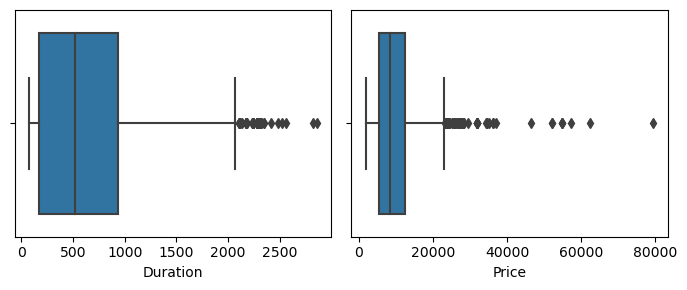

In [75]:
plt.figure(figsize=(7,3))
t=1
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [76]:
data[data['Duration']>2000]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
226,Jet Airways,Delhi,Cochin,Not Busy,2245,2 stops,No info,18799,6,3,3,5,25,18,50
470,Jet Airways,Delhi,Cochin,Not Busy,2045,2 stops,No info,13082,3,3,21,18,20,4,25
553,Air India,Delhi,Cochin,Not Busy,2295,2 stops,No info,10598,5,3,9,5,0,19,15
919,Air India,Kolkata,Banglore,Not Busy,2115,3 stops,No info,10991,6,5,12,12,0,23,15
925,Jet Airways,Delhi,Cochin,Not Busy,2135,2 stops,No info,19907,2,3,6,16,50,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,Air India,Banglore,Delhi,Not Busy,2345,2 stops,No info,17135,4,3,1,8,50,23,55
10020,Air India,Delhi,Cochin,Not Busy,2295,2 stops,No info,9653,3,5,9,5,0,19,15
10326,Air India,Banglore,Delhi,Not Busy,2420,2 stops,No info,11791,6,3,3,5,50,22,10
10456,Jet Airways,Delhi,Cochin,Not Busy,2860,2 stops,No info,20694,2,3,6,19,10,18,50


<a id='encoding'> </a>
## 8. Encoding, Scaling and Feature Tranformation

#### We are performing frequency encoding in Airline ,Source and Destination

In [77]:
te = data['Airline'].value_counts(normalize= True)
te

Jet Airways                          0.360360
IndiGo                               0.192210
Air India                            0.163842
Multiple carriers                    0.111975
SpiceJet                             0.076585
Vistara                              0.044846
Air Asia                             0.029866
GoAir                                0.018163
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: Airline, dtype: float64

In [78]:
data['Airline'] = data['Airline'].map(te.to_dict())

In [79]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.192210,Banglore,Delhi,Busy,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,0.163842,Kolkata,Banglore,Not Busy,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,0.360360,Delhi,Cochin,Not Busy,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,0.192210,Kolkata,Banglore,Not Busy,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,0.192210,Banglore,Delhi,Not Busy,285,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.029866,Kolkata,Banglore,Busy,150,non-stop,No info,4107,1,4,9,19,55,22,25
10679,0.163842,Kolkata,Banglore,Busy,155,non-stop,No info,4145,5,4,27,20,45,23,20
10680,0.360360,Banglore,Delhi,Busy,180,non-stop,No info,7229,5,4,27,8,20,11,20
10681,0.044846,Banglore,Delhi,Busy,160,non-stop,No info,12648,4,3,1,11,30,14,10


In [80]:
for i in ['Source','Destination']:
    d = data[i].value_counts(normalize=True).to_dict()
    data[i] = data[i].map(d)

In [81]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.192210,0.205692,0.205692,Busy,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,0.163842,0.268795,0.268795,Not Busy,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,0.360360,0.424679,0.424679,Not Busy,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,0.192210,0.268795,0.268795,Not Busy,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,0.192210,0.205692,0.205692,Not Busy,285,1 stop,No info,13302,4,3,1,16,50,21,35


#### We wil perform label encoding in Route and total stops

In [82]:
data['Route'] = data['Route'].map({'Busy':1,'Not Busy':0})

In [83]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.192210,0.205692,0.205692,1,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,0.163842,0.268795,0.268795,0,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,0.360360,0.424679,0.424679,0,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,0.192210,0.268795,0.268795,0,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,0.192210,0.205692,0.205692,0,285,1 stop,No info,13302,4,3,1,16,50,21,35


In [84]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [85]:
data['Total_Stops']= data['Total_Stops'].map({'non-stop':0,
                                             '1 stop':1,
                                             '2 stops':2,
                                             '3 stops':3,
                                             '4 stops':4})

In [86]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [87]:
data['Additional_Info'] = data['Additional_Info'].replace({'No Info':'No info'})

In [88]:
data['Additional_Info'].value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Since the count of 3 ctaegories is same, lets do target encoding

In [89]:
te = data.groupby(by=['Additional_Info'])['Price'].mean()
te

Additional_Info
1 Long layover                  22109.631579
1 Short layover                 26743.000000
2 Long layover                  26480.000000
Business class                  56811.250000
Change airports                 16800.714286
In-flight meal not included      9471.834511
No check-in baggage included     3645.156250
No info                          9140.144261
Red-eye flight                  10873.000000
Name: Price, dtype: float64

In [90]:
te = te/sum(te)
te

Additional_Info
1 Long layover                  0.121432
1 Short layover                 0.146879
2 Long layover                  0.145435
Business class                  0.312022
Change airports                 0.092274
In-flight meal not included     0.052022
No check-in baggage included    0.020020
No info                         0.050200
Red-eye flight                  0.059717
Name: Price, dtype: float64

In [91]:
data['Additional_Info'] = data['Additional_Info'].map(te.to_dict())

In [92]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.192210,0.205692,0.205692,1,170,0,0.0502,3897,6,3,24,22,20,1,10
1,0.163842,0.268795,0.268795,0,445,2,0.0502,7662,2,5,1,5,50,13,15
2,0.360360,0.424679,0.424679,0,1140,2,0.0502,13882,6,6,9,9,25,4,25
3,0.192210,0.268795,0.268795,0,325,1,0.0502,6218,6,5,12,18,5,23,30
4,0.192210,0.205692,0.205692,0,285,1,0.0502,13302,4,3,1,16,50,21,35


#### Let's transform the duration to eliminate outliers and make the distribution normal

In [93]:
data['Duration'].describe()

count    10681.000000
mean       643.080236
std        507.816377
min         75.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: Duration, dtype: float64

In [94]:
from sklearn.preprocessing import PowerTransformer

In [95]:
pt = PowerTransformer(standardize=False)

In [96]:
data['Duration']= pt.fit_transform(pd.DataFrame(data['Duration']))

<AxesSubplot:title={'center':'Skewness: -0.04'}, xlabel='Duration', ylabel='Density'>

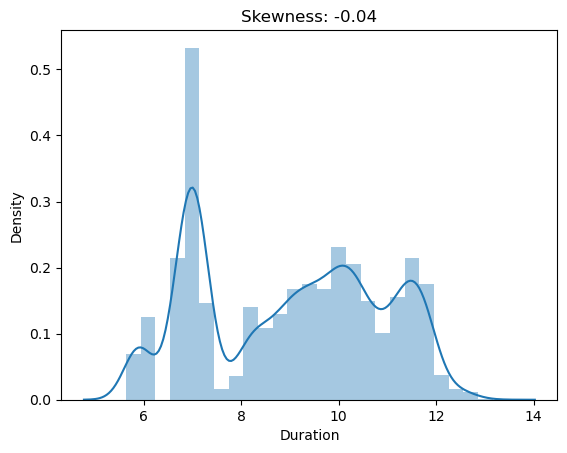

In [97]:
plt.title('Skewness: %.2f'%data['Duration'].skew())
sns.distplot(data['Duration'])

<AxesSubplot:xlabel='Duration'>

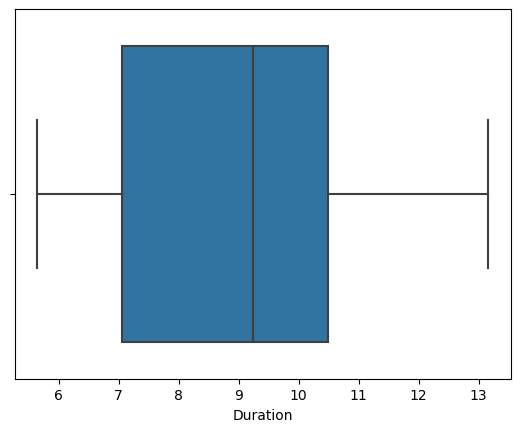

In [98]:
sns.boxplot(data['Duration'])

In [99]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.192210,0.205692,0.205692,1,7.057306,0,0.0502,3897,6,3,24,22,20,1,10
1,0.163842,0.268795,0.268795,0,8.911927,2,0.0502,7662,2,5,1,5,50,13,15
2,0.360360,0.424679,0.424679,0,10.943134,2,0.0502,13882,6,6,9,9,25,4,25
3,0.192210,0.268795,0.268795,0,8.282489,1,0.0502,6218,6,5,12,18,5,23,30
4,0.192210,0.205692,0.205692,0,8.026369,1,0.0502,13302,4,3,1,16,50,21,35


#### Let's Scale the duration to bring it on same scale as other variables

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
se = StandardScaler()

In [102]:
data['Duration']= se.fit_transform(pd.DataFrame(data['Duration']))

<a id='split'> </a>
## 9. Train Test Split

In [103]:
x = data.drop(columns=['Price'])
y = data['Price']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [106]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8544, 14) (8544,) (2137, 14) (2137,)


<a id='model'> </a>
## 10. Model building

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import sklearn.metrics as met
from sklearn.model_selection import KFold, cross_val_score

In [108]:
ols= sm.OLS(y_train, x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              6129.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):                        0.00
Time:                        20:49:07   Log-Likelihood:                         -80966.
No. Observations:                8544   AIC:                                  1.620e+05
Df Residuals:                    8531   BIC:                                  1.621e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Airline          7979.9837    316.410     25.220      0.000    7359.744    8600.223
Source            942.8522    182.874      5.156      0.000     584.375    1301.329
Destination       942.8522    182.874      5.156      0.000     584.375    1301.329
Route            1139.8457     88.677     12.854      0.000     966.018    1313.673
Duration          566.9858     62.500      9.072      0.000     444.470     689.501
Total_Stops      3155.5322    106.991     29.494      0.000    2945.805    3365.260
Additional_Info    1.2e+05   3418.092     35.109      0.000    1.13e+05    1.27e+05
Journey_weekday   140.4831     16.887      8.319      0.000     107.381     173.585
Jouney_month     -497.9927     27.901    -17.849      0.000    -552.685    -443.301
Journey_day       -61.2431      3.982    -15.382      0.000     -69.048     -53.438
Dep_Hour           23.6635      5.910      4.004      0.000      12.078      35.248
Dep_Min             1.7913      1.823      0.983      0.326      -1.782       5.365
Arr_Hour           -3.9633      4.964     -0.798      0.425     -13.693       5.767
Arr_Min            -3.6723      2.094     -1.754      0.079      -7.776       0.432
==============================================================================
Omnibus:                     5670.718   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224656.643
Skew:                           2.643   Prob(JB):                         0.00
Kurtosis:                      27.558   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.43e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Let's Build different models and find out which are performing best. We will use root mean squared error to cross validate the score on train dataset.**

In [109]:
# Dictionary of Models

def base_models():
    models= dict()
    models['lr']= LinearRegression()
    models["tree"] = DecisionTreeRegressor()
    models["rf"] = RandomForestRegressor()
    models["ada"] = AdaBoostRegressor()
    models["gbm"] = GradientBoostingRegressor()
    models["xgb"] = XGBRegressor()
    models['knn']= KNeighborsRegressor()
    return models

In [110]:
# Evaluation score for the models

def eval_Score(model):
    cv= KFold(n_splits=5, shuffle=True, random_state=42)
    score= np.abs(cross_val_score(model, x_train, y_train, scoring='neg_root_mean_squared_error', cv=cv))
    return score

In [111]:
# Let's build the models
models= base_models()  

result, names= list(), list()

for name, model in models.items():
    finalscores= eval_Score(model)
    result.append(finalscores)
    names.append(name)
    print((name, np.mean(result)), np.std(result))

('lr', 3164.951346330724) 164.08743221072623
('tree', 2581.292232294714) 606.4022729939975
('rf', 2235.1846877437524) 705.7453864056073
('ada', 2628.4721269085885) 918.4679923956855
('gbm', 2502.354698560123) 862.6468199343998
('xgb', 2335.8402552364764) 873.8940975737544
('knn', 2473.244421819082) 879.8774503862368


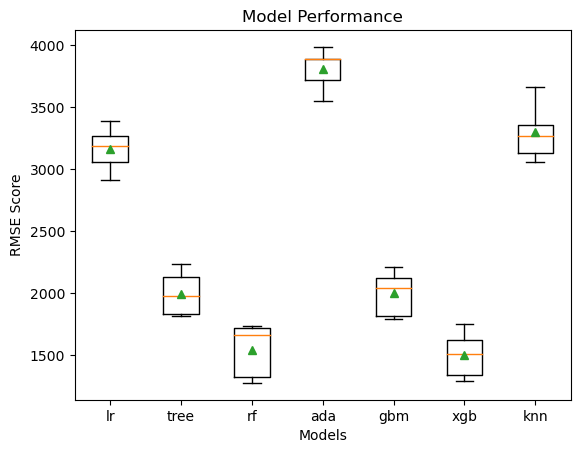

In [112]:
# Code for plotting this....

plt.boxplot(result, labels = names, showmeans = True)
plt.xlabel("Models")
plt.ylabel("RMSE Score")
plt.title("Model Performance")
plt.show()

Since random forest and xtreme gradient boosting models have the least error, we will build these models and evaluate how they are performing.

**Random Forest**

In [113]:
rf= RandomForestRegressor()
rf_model= rf.fit(x_train, y_train)
y_pred= rf_model.predict(x_train)
met.r2_score(y_train, y_pred)

0.9828661028215757

In [114]:
y_pred= rf_model.predict(x_test)
met.r2_score(y_test, y_pred)

0.8841103377075618

**Xgboost**

In [118]:
xgb= XGBRegressor()
xgb_model= xgb.fit(x_train, y_train)
y_pred= xgb_model.predict(x_train)
met.r2_score(y_train, y_pred)

0.972252522038743

In [119]:
y_pred= xgb_model.predict(x_test)
met.r2_score(y_test, y_pred)

0.9035656168631659

**Clearly both the models are overfitted as they are performing good on the train set but not on the test set. Since, the xg boost is performing better than random forest, we will try to reduce the overfitting condition using regularization.**

In [121]:
from sklearn.model_selection import GridSearchCV

In [123]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(x_train, y_train)
print('Best parameters for XGBoost Regressor: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost Regressor:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3} 



In [124]:
xgb= XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3)
xgb_model= xgb.fit(x_train, y_train)
y_pred= xgb_model.predict(x_train)
met.r2_score(y_train, y_pred)

0.8224083660637782

In [125]:
y_pred= xgb_model.predict(x_test)
met.r2_score(y_test, y_pred)

0.8256689812523463